In [1]:
import os

import jax
import jax.numpy as jnp
from jax import random,  vmap, jit
from jax import config
from jax import lax
from jax.flatten_util import ravel_pytree

import itertools
from functools import partial
from tqdm.auto import trange, tqdm
import time

from scipy.interpolate import griddata
from scipy.sparse import csr_matrix

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams.update({'font.size': 4})


jax.config.update("jax_enable_x64", True)
from A4M2 import PKS
from auxx import gen_initX

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Processing M0=20, T=0.1...


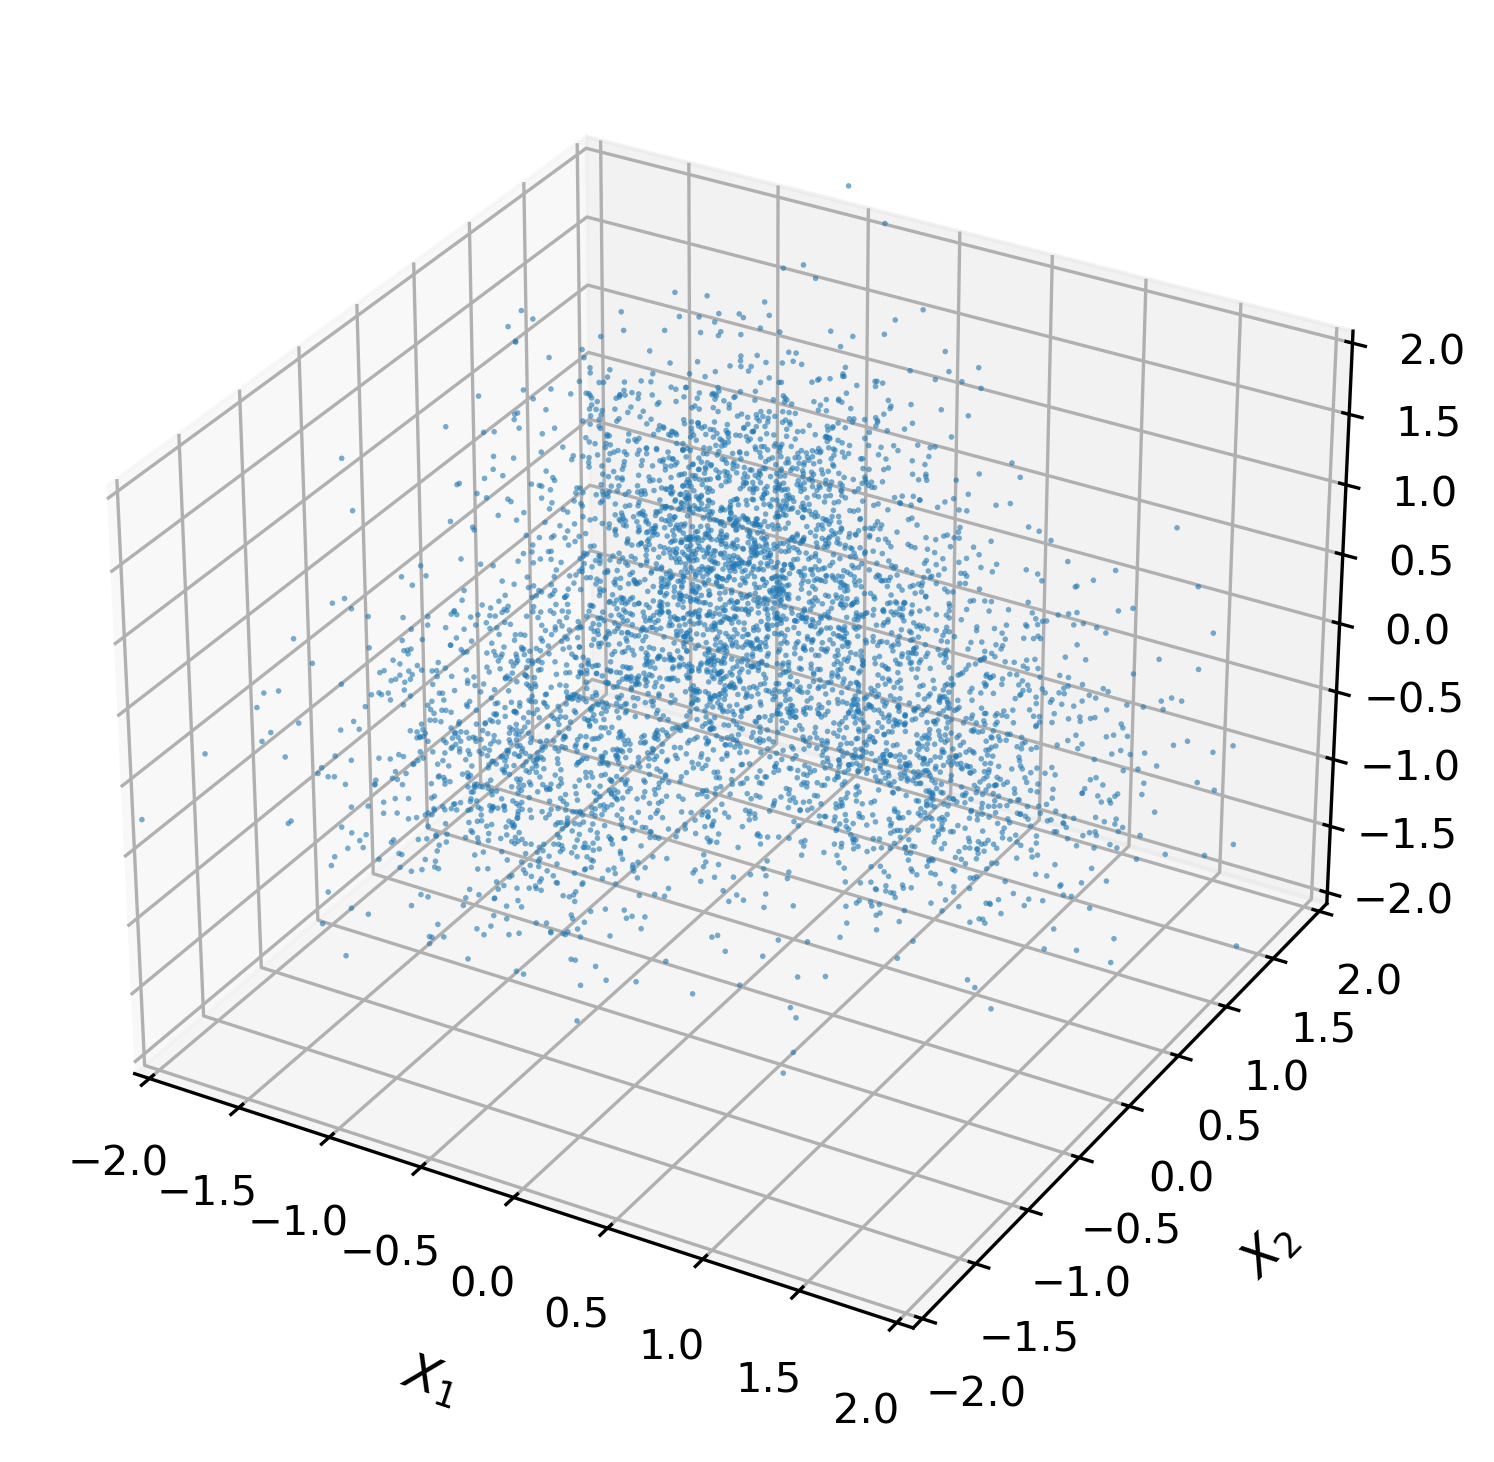

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Processing M0=20, T=0.2...


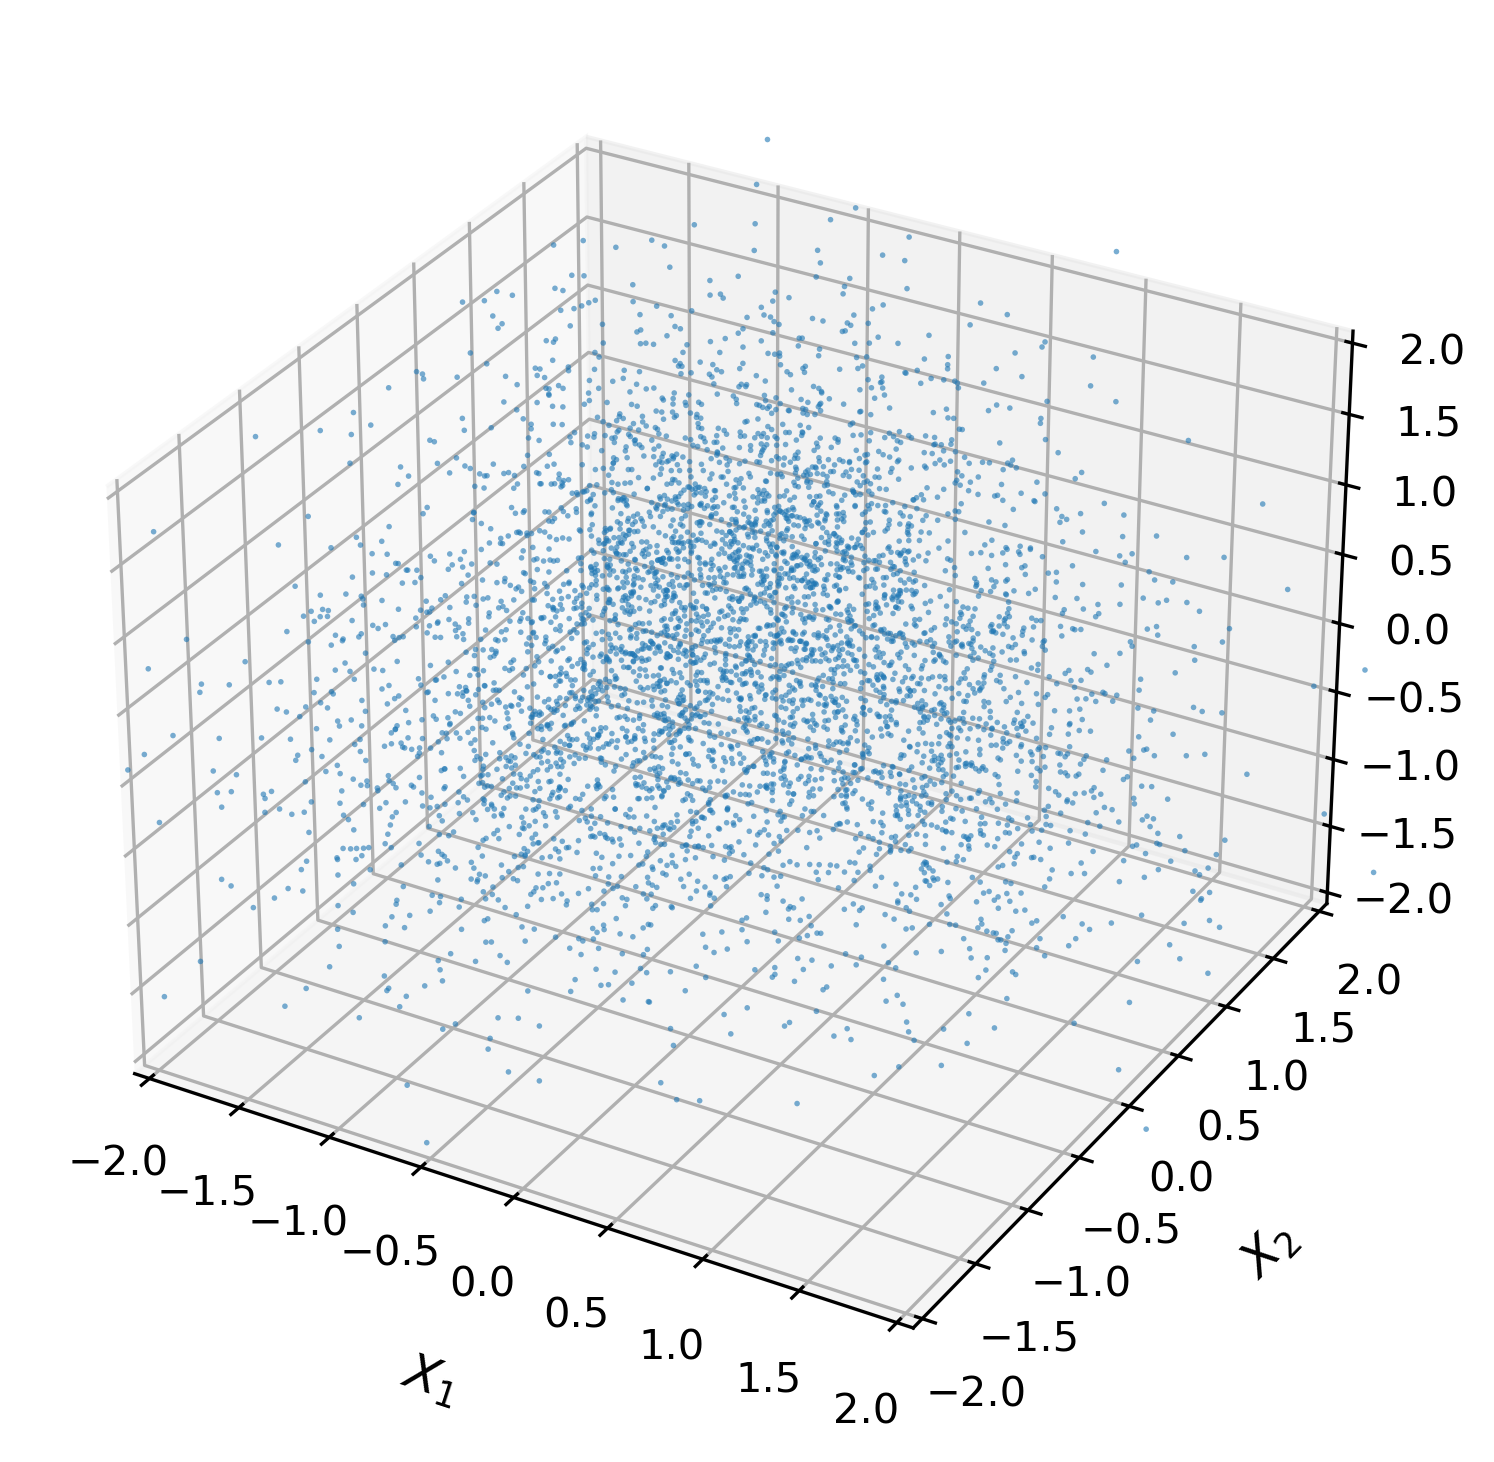

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Processing M0=20, T=0.4...


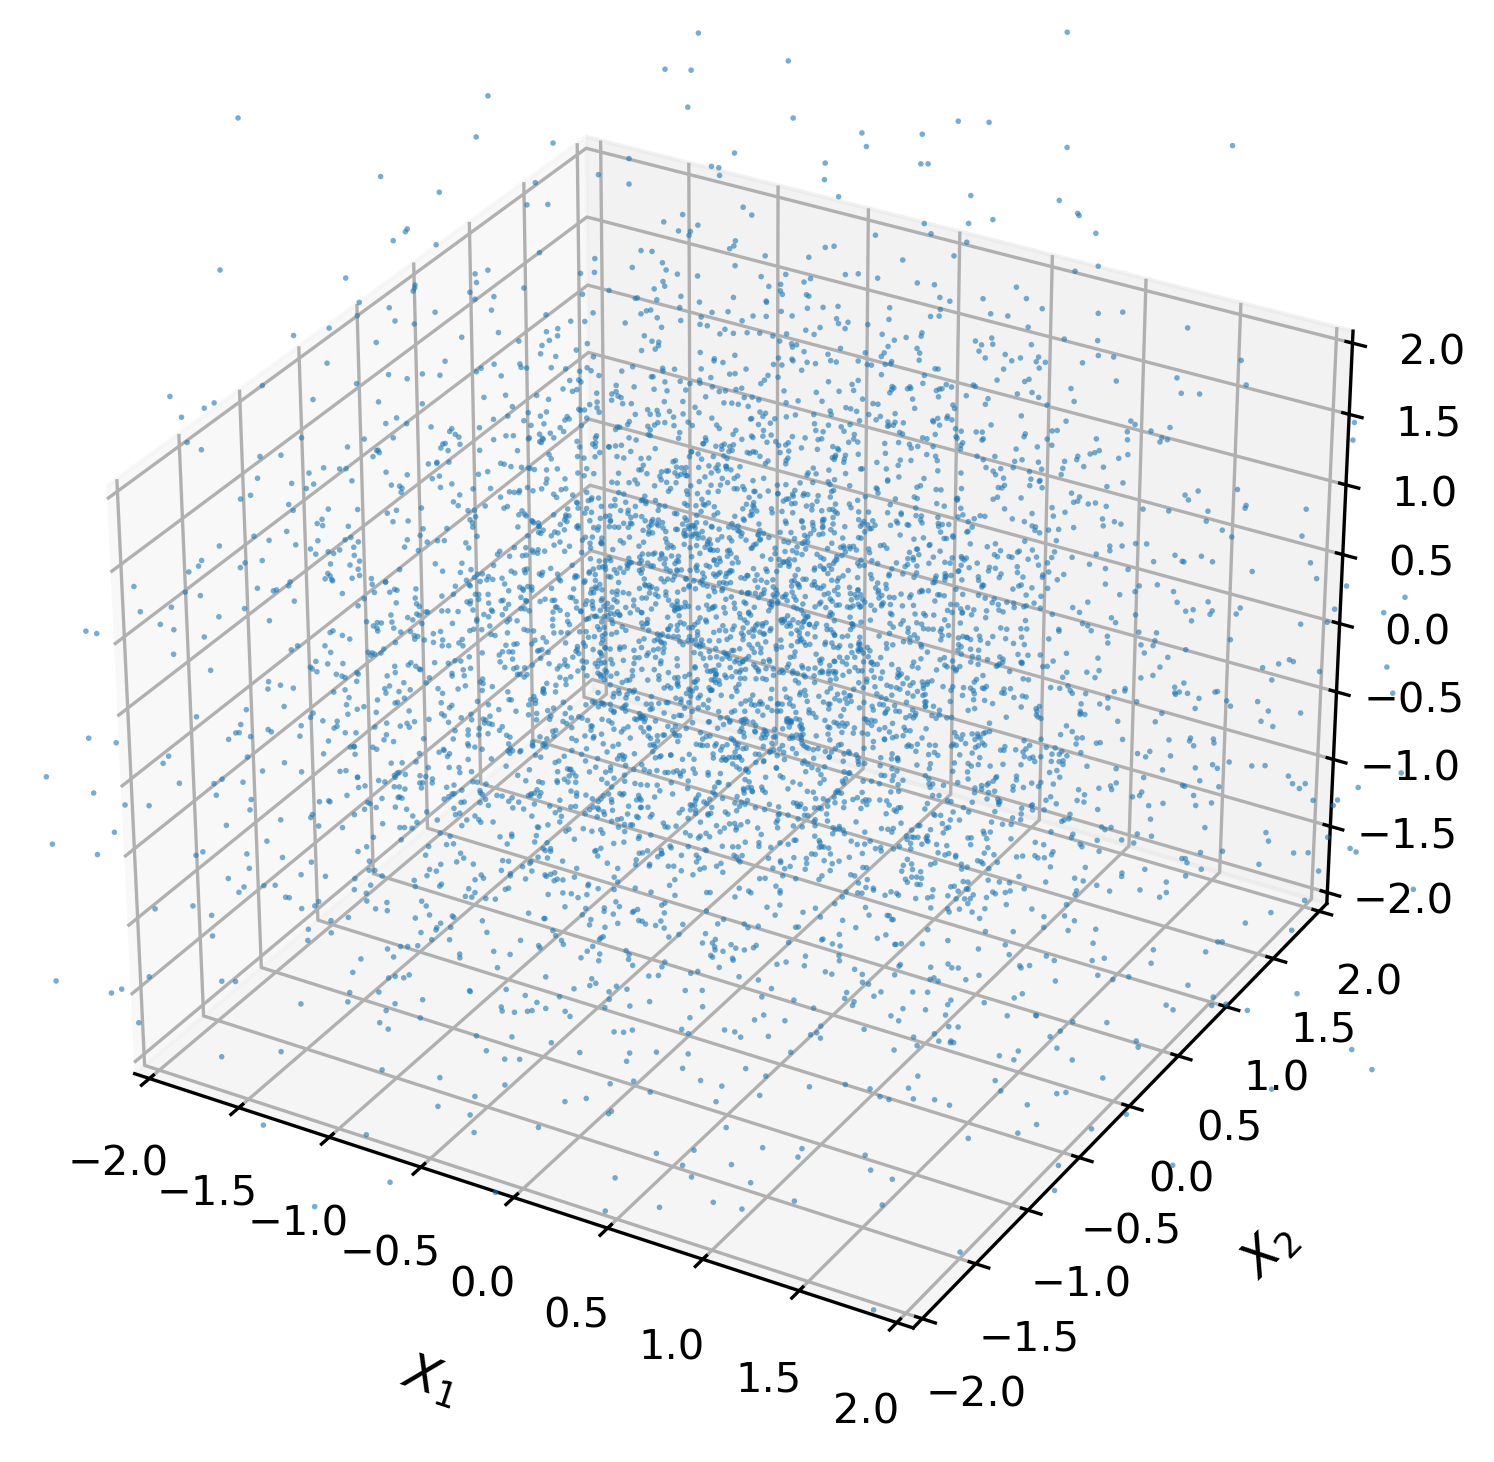

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Processing M0=80, T=0.1...


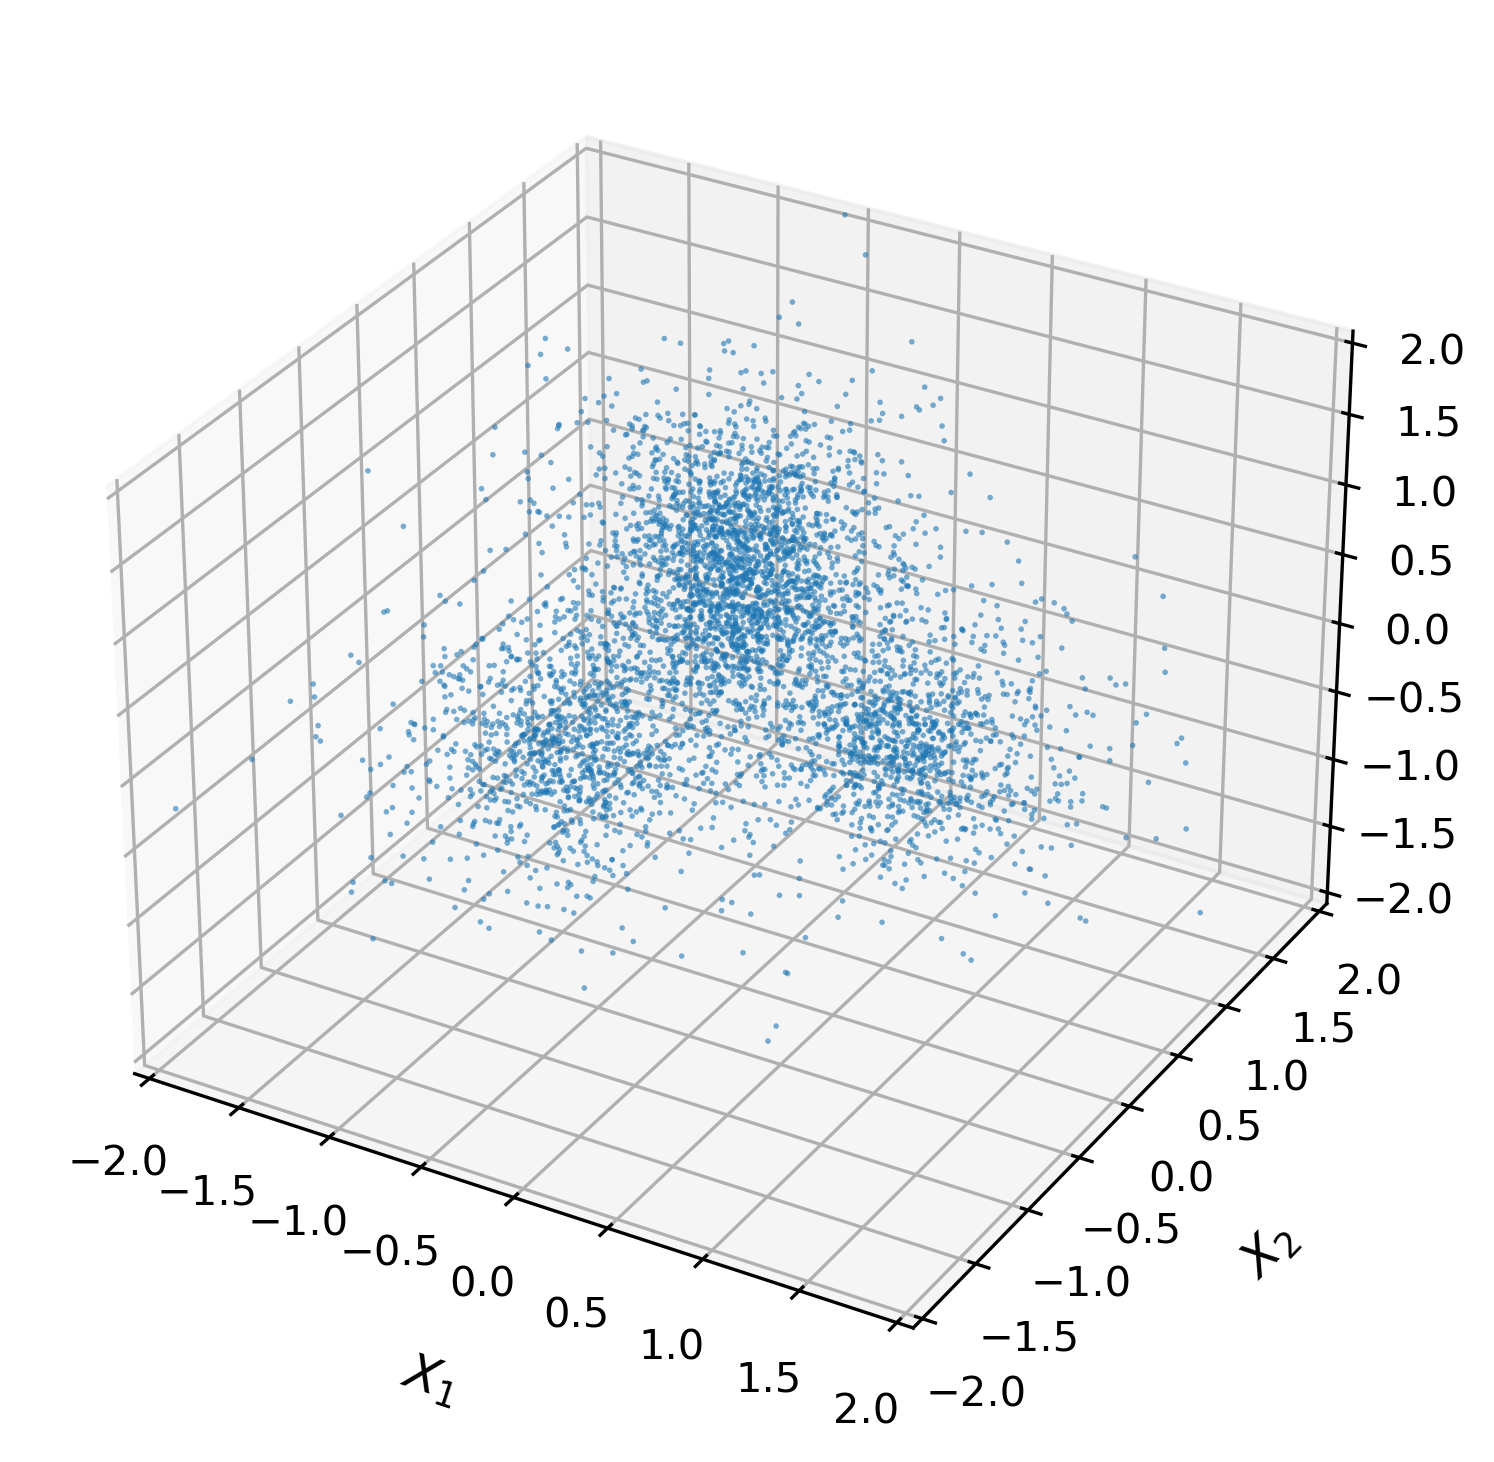

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Processing M0=80, T=0.2...


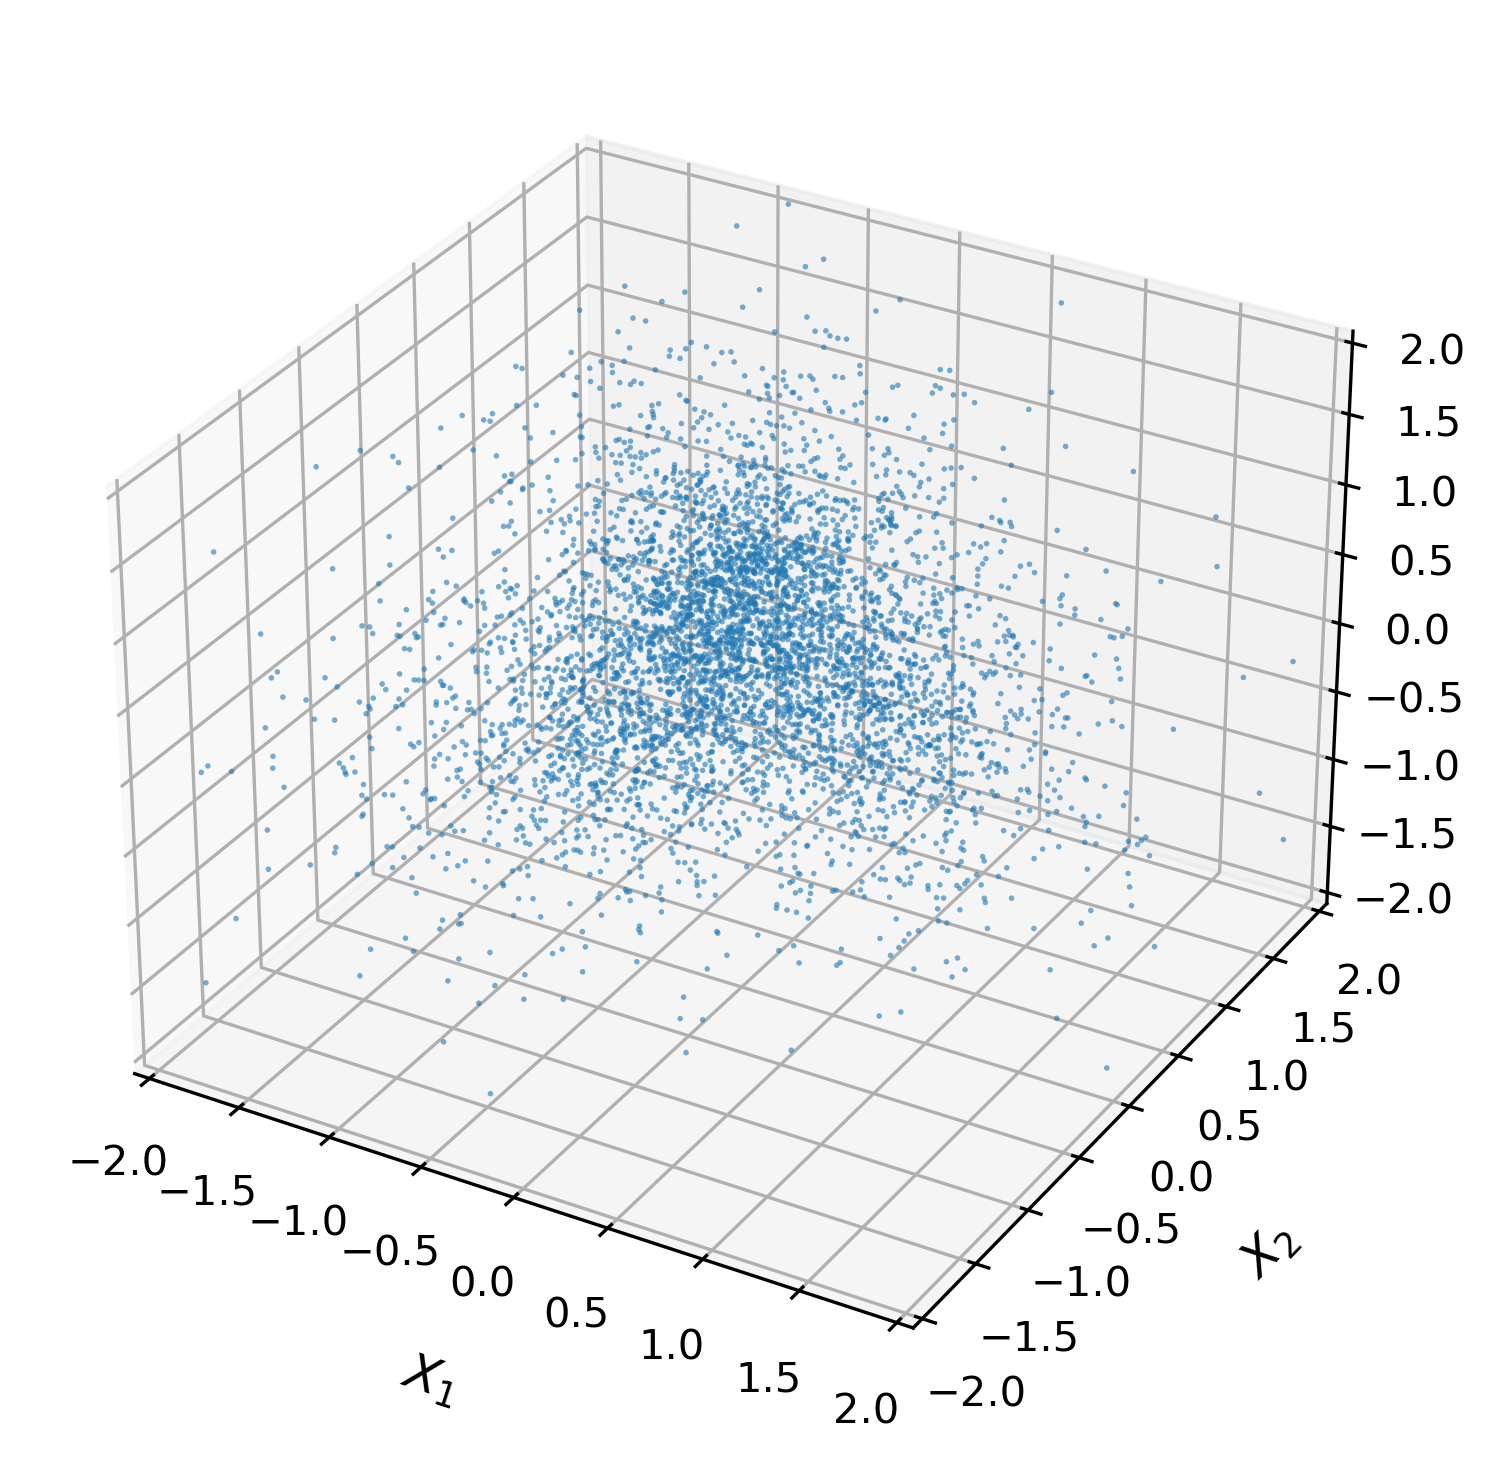

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Processing M0=80, T=0.4...


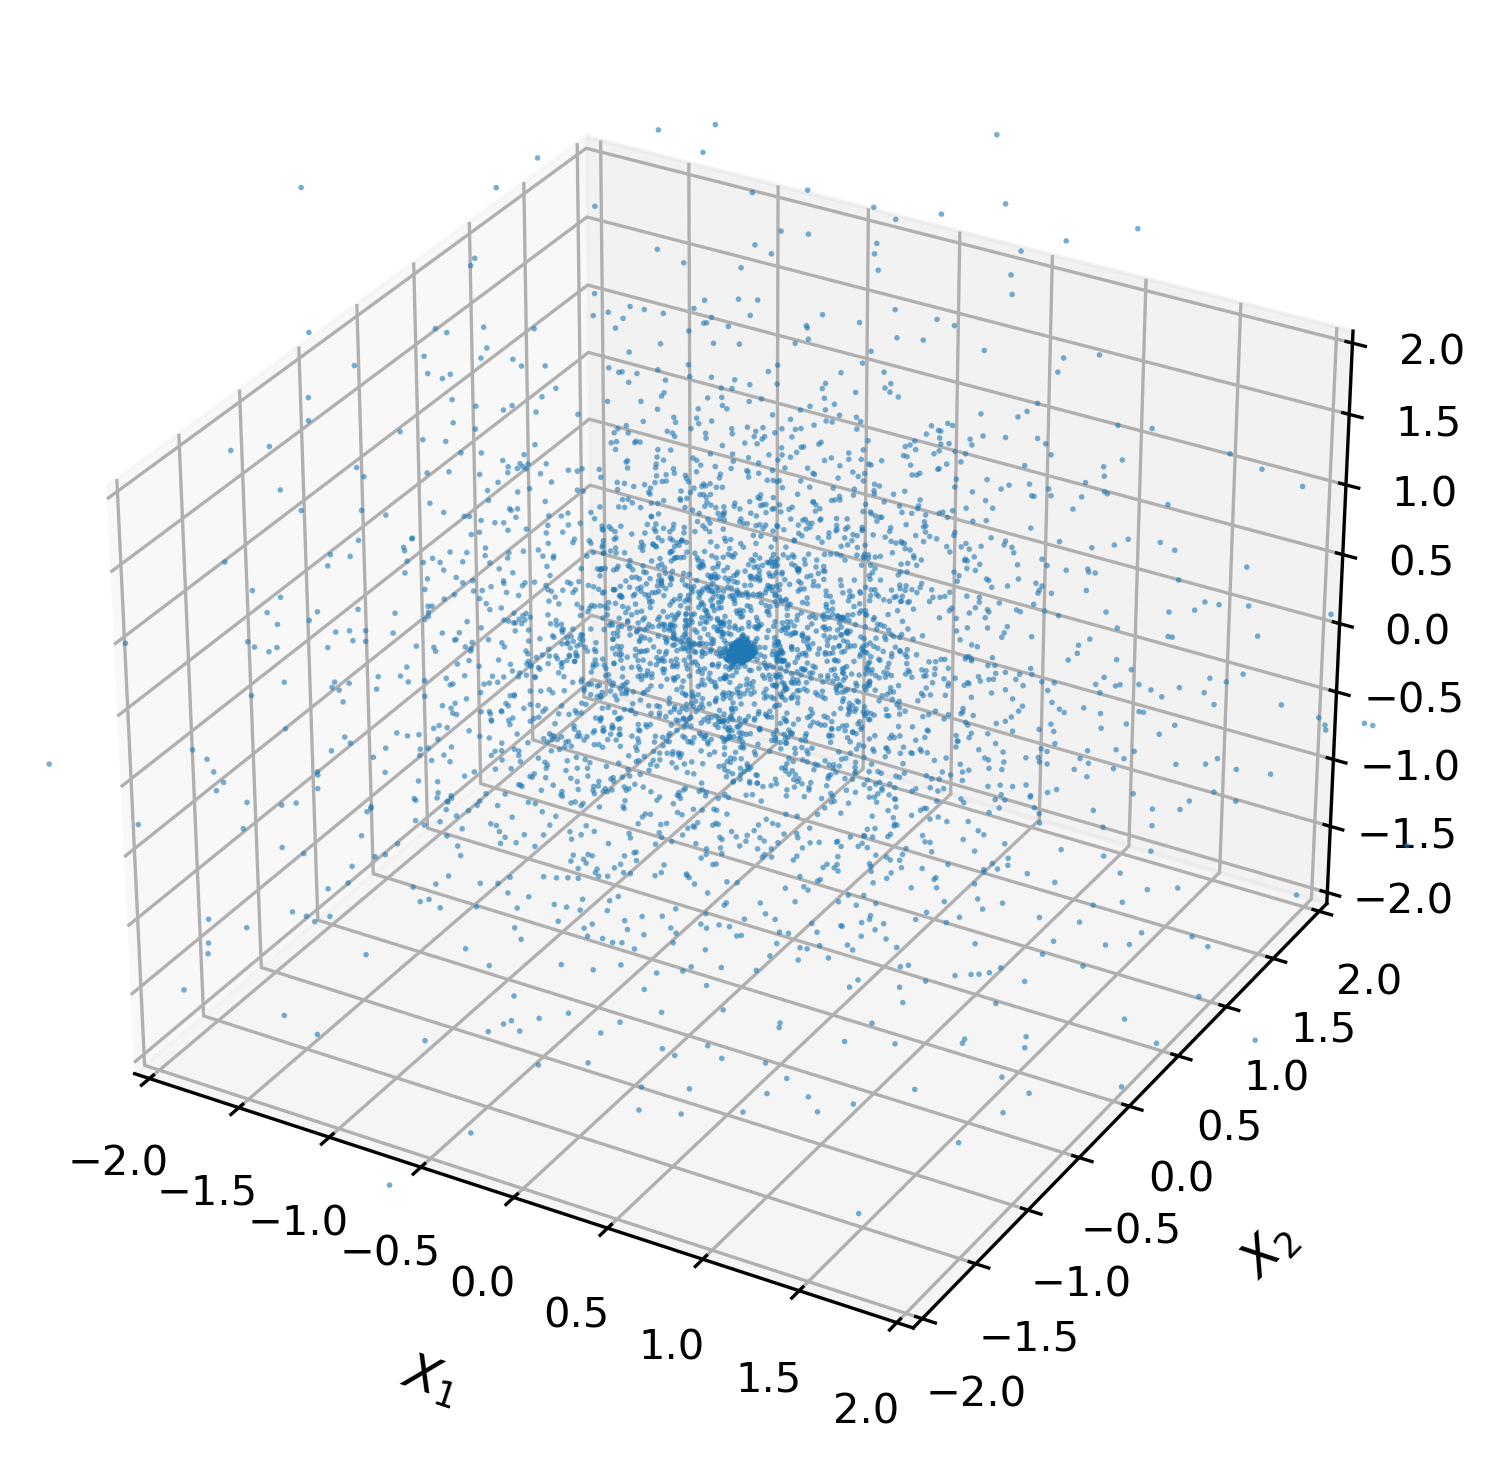

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Processing M0=160, T=0.1...


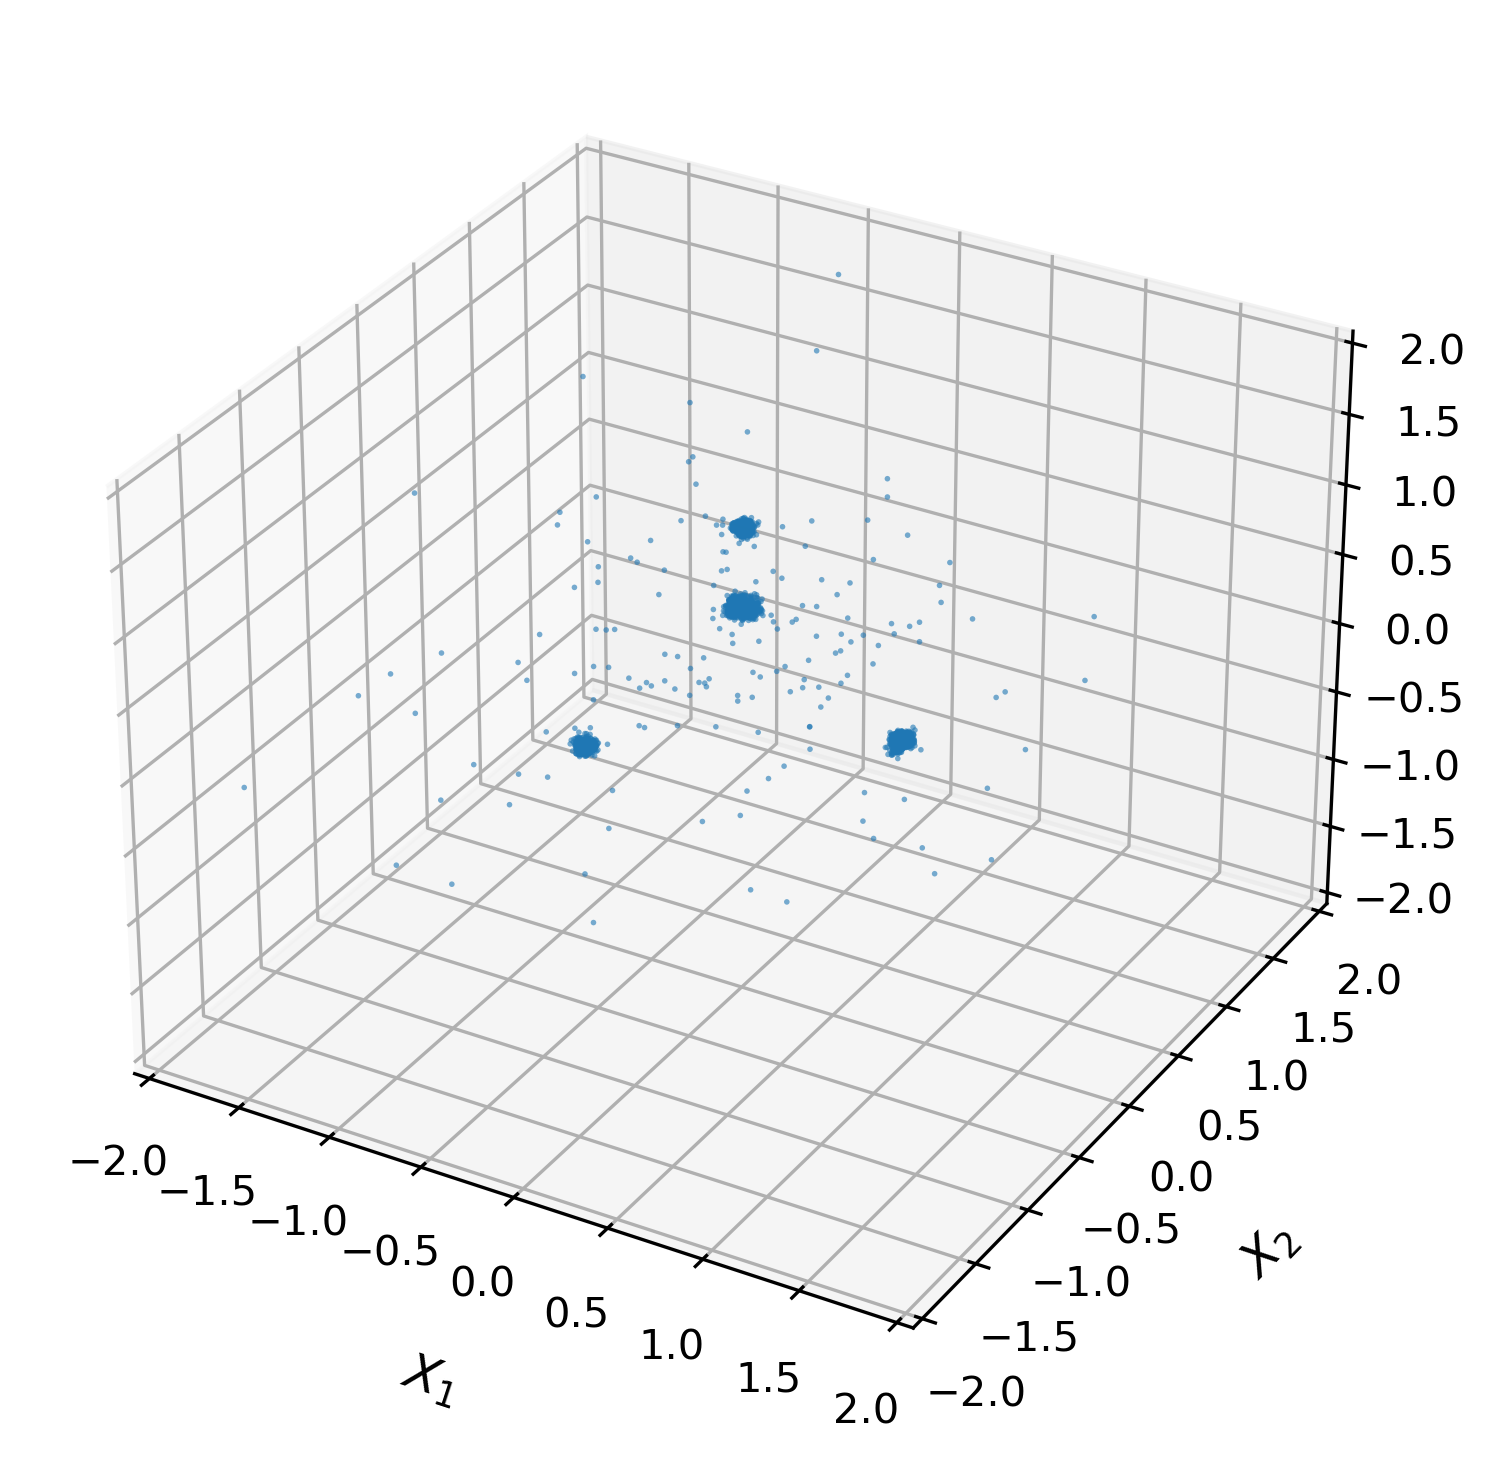

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Processing M0=160, T=0.2...


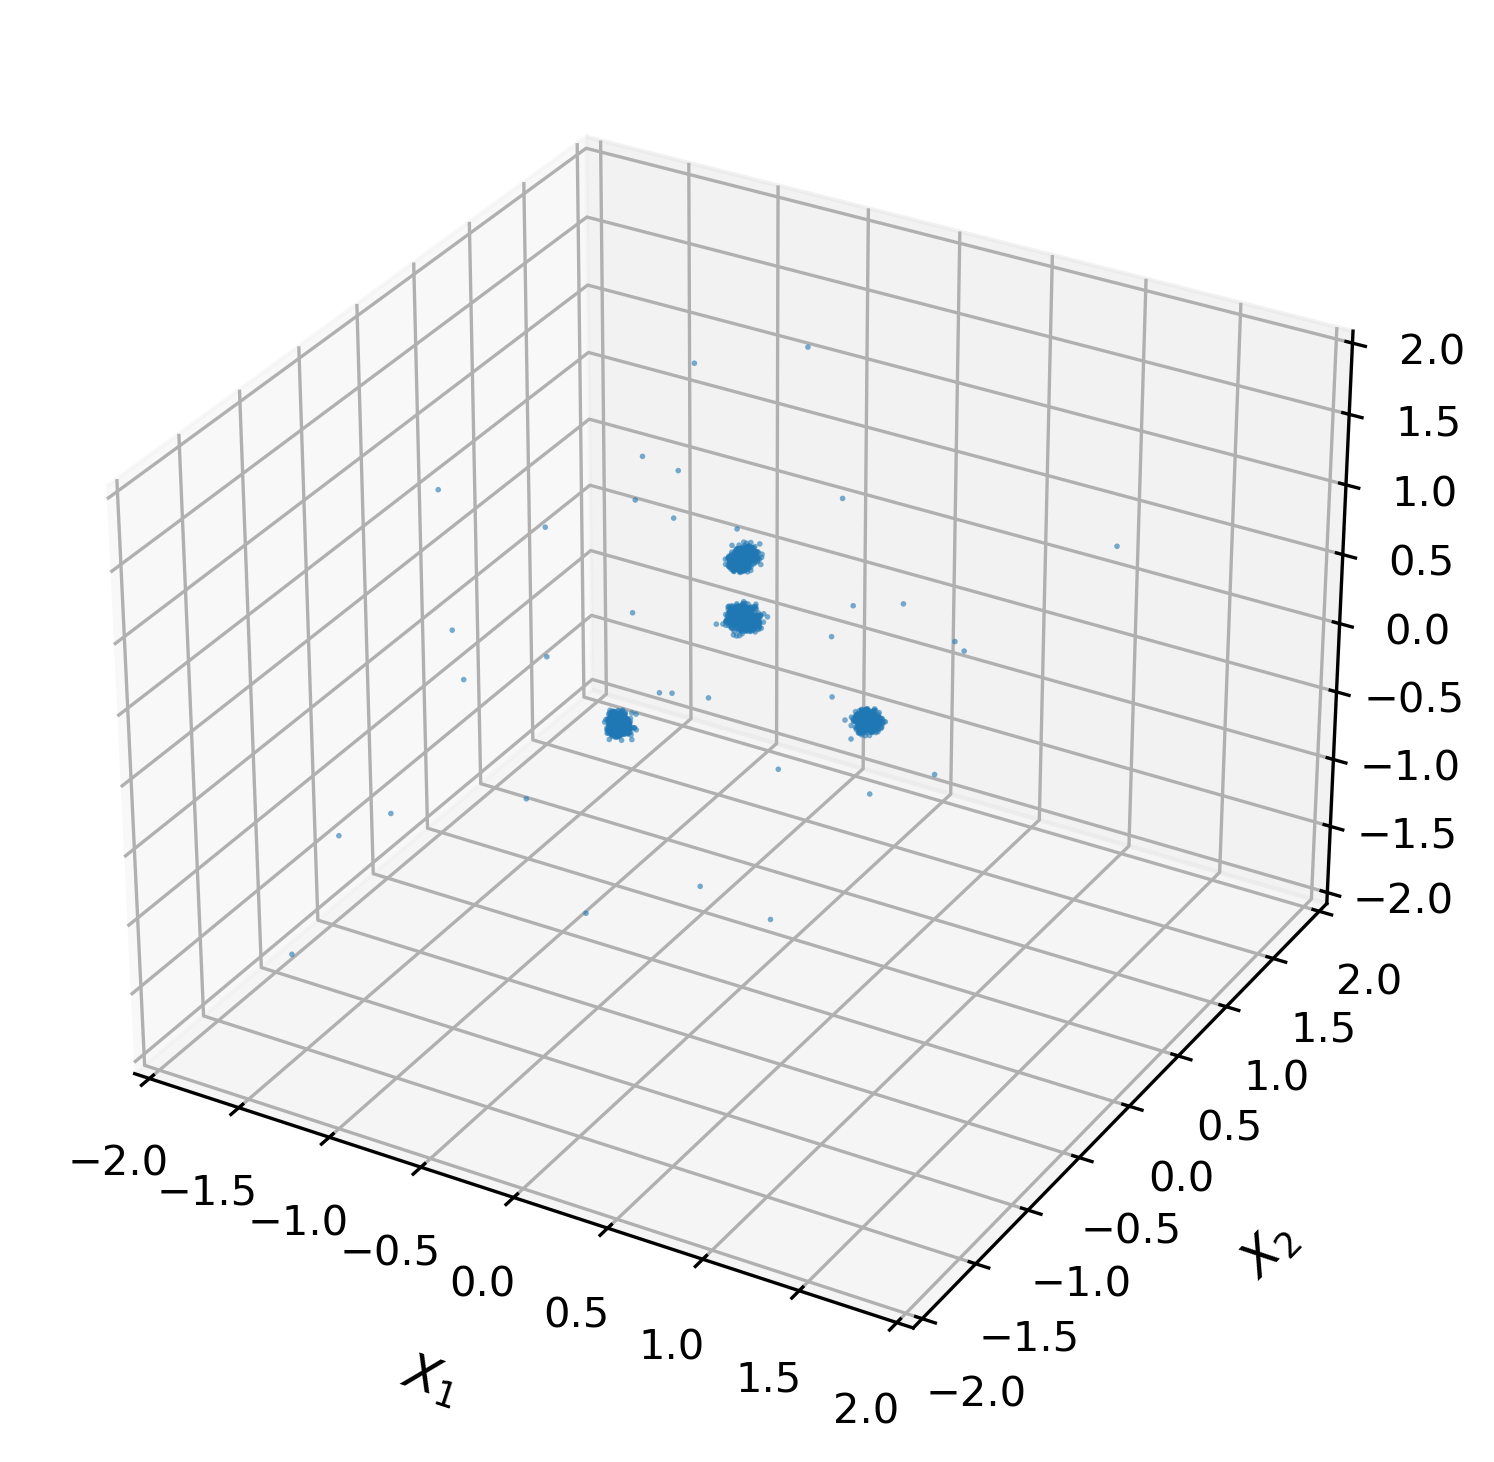

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Processing M0=160, T=0.4...


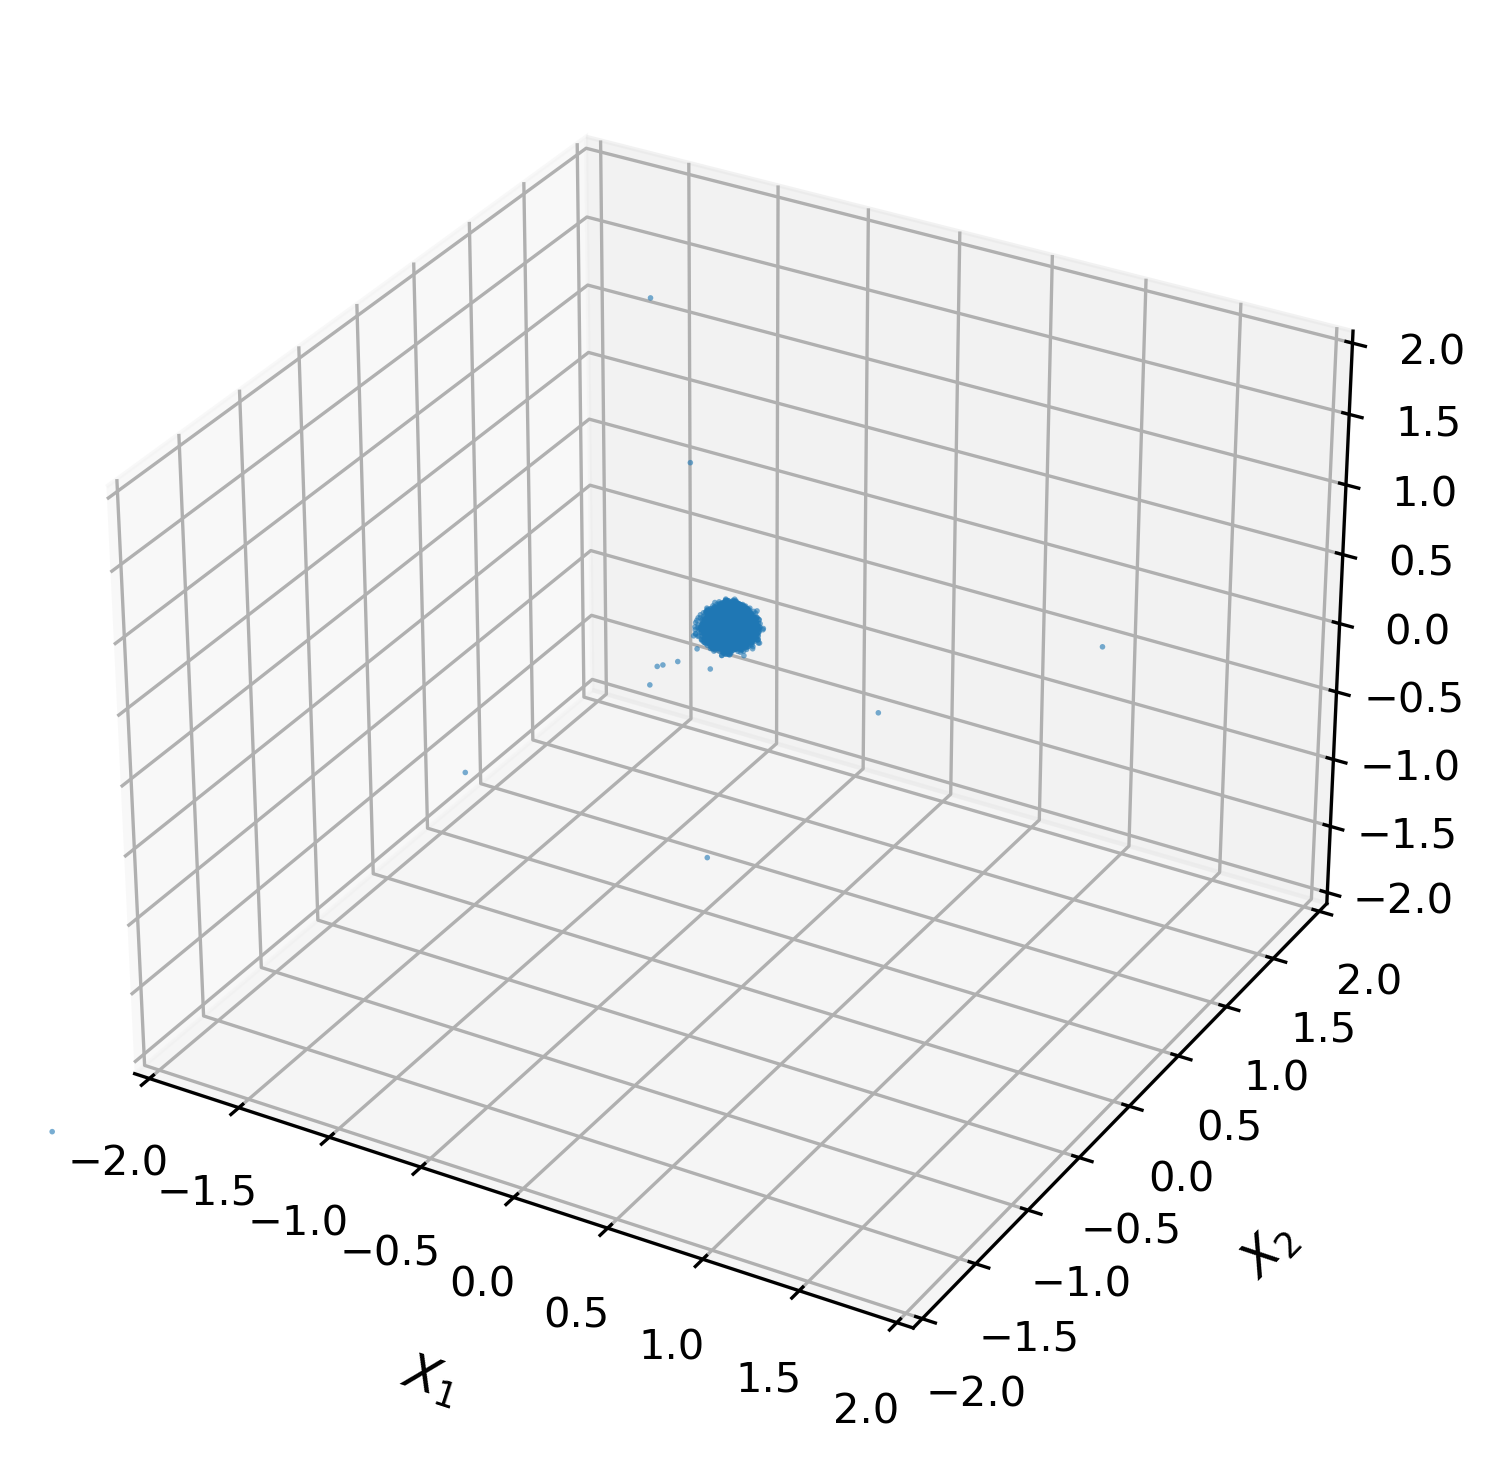

All visualizations completed!


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os  # 需要导入os模块

M0_list = [20, 80, 160] 
T_list = [0.1, 0.2, 0.4]                 
H = 256                                  
samples_per_sphere = 1200         
output_dir = "figures"                  

os.makedirs(output_dir, exist_ok=True)

def visualize_configuration(M, t):
    t_formatted = f"{t:.6f}".replace('.', '_')
    file_path = f"data/M{M}H{H}_{t_formatted}.npy"
    
    try:
        points = np.load(file_path)
    except FileNotFoundError:
        print(f"Warning: File {file_path} not found, skipping...")
        return
    
    total_points = points.shape[0]
    points_per_sphere = total_points // 4
    
    sampled_points = []
    for sphere_id in range(4):
        start = sphere_id * points_per_sphere
        end = (sphere_id + 1) * points_per_sphere
        sphere_points = points[start:end]
        selected_points = sphere_points[:samples_per_sphere]
        sampled_points.append(selected_points)
    
    sampled_points = np.vstack(sampled_points)
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # 修改后的绘图设置
    ax.scatter3D(
        sampled_points[:, 0], sampled_points[:, 1], sampled_points[:, 2],
        color='#1f77b4',  # 统一使用指定的蓝色
        s=1.8,           # 点的大小
        alpha=0.6,       # 透明度
        depthshade=True,  # 启用深度阴影
        edgecolors='none' # 无边线
    )
    
    # 设置坐标轴范围
    ax.set_xlim3d(-2, 2)
    ax.set_ylim3d(-2, 2)
    ax.set_zlim3d(-2, 2)
    
    # 设置坐标轴标签
    ax.set_xlabel('$X_1$', fontsize=12, labelpad=10)
    ax.set_ylabel('$X_2$', fontsize=12, labelpad=10)
    ax.set_zlabel('$X_3$', fontsize=12, labelpad=10)
    
    # 设置刻度
    plt.tick_params(axis='both', labelsize=10)
    
    # 保存图像
    output_filename = f"M0_{M}_T{t:.1f}".replace('.', '_') + ".eps"
    plt.savefig(os.path.join(output_dir, output_filename), 
                dpi=300, 
                bbox_inches='tight',
                format='eps',
                transparent=True)
    plt.show()
    plt.close()

# 遍历所有参数组合
for M0 in M0_list:
    for T in T_list:
        print(f"Processing M0={M0}, T={T}...")
        visualize_configuration(M0, T)

print("All visualizations completed!")